# Data Science Onboarding - Pandas Practice Notebook

In this notebook, we will practice some common data wrangling techniques using Python and the Pandas library.

## Importing Libraries

Before we begin, let's import the necessary libraries.

### Task 1: Import Pandas, Numpy, and Plotly Express

In [109]:
import pandas as pd
import numpy as np
import plotly.express as px

## Loading Data

We'll start by loading some data into a Pandas DataFrame. For this example, we'll use a sample dataset from the Historicals project containing information about the project progress Quantity, project actual hours, and metrics mapping.

### Task 2: Load the Sample_Progress_Data, Sample_Hour_Data, and Metrics List 

Load the sample_progress_data.csv file and name it as progress_data<br>
Load the sample_hour_data.csv file and name it as actual_hour_data<br>
Load the metrics_list.xlsx file and name it as metrics_list

In [117]:
progress_data = pd.read_csv('sample_progress_data.csv')
actual_hour_data = pd.read_csv('sample_actual_hour_data.csv')
metrics_list = pd.read_excel('metrics_list.xlsx', sheet_name ='summary')

## Exploring the Data

Let's explore the data to get a better understanding of what we're working with.

### Task 3: display the first 5 rows of the Progress DataFrame. 

In [114]:
progress_data.head(5)

,project_number,project_name,cost_code,cc_uom,installed_date,weekending_period_hr,weekending_period_qty,cbs_code,week_ending,cbs_description,costcode
0,1300642,Cascade Power Project,16004200-MAJOR ELEC EQUIP,EA,2022-05-03,2.570,1.000,1815.0,2022-05-07,Major Electrical Equipment,16004200
1,1300642,Cascade Power Project,16005210-FIELD RUN TRAY,LM,2022-06-26,24.096,24.240,1806.0,2022-07-02,Cable Tray & Supports,16005210
2,1300642,Cascade Power Project,16005210-FIELD RUN TRAY,LM,2022-07-10,51.806,52.116,1806.0,2022-07-16,Cable Tray & Supports,16005210
3,1300642,Cascade Power Project,16005210-FIELD RUN TRAY,LM,2022-09-15,12.814,12.890,1806.0,2022-09-17,Cable Tray & Supports,16005210
4,1300642,Cascade Power Project,16005210-FIELD RUN TRAY,LM,2022-09-15,19.220,12.890,1806.0,2022-09-17,Cable Tray & Supports,16005210


### Task 4: display the general information about the Progress DataFrame, including number of rows and columns, the data types of each column, and the number of non-null values.

In [121]:
progress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185078 entries, 0 to 185077
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   project_number         185078 non-null  int64  
 1   project_name           185078 non-null  object 
 2   cost_code              185078 non-null  object 
 3   cc_uom                 185078 non-null  object 
 4   installed_date         185078 non-null  object 
 5   weekending_period_hr   185078 non-null  float64
 6   weekending_period_qty  185078 non-null  float64
 7   cbs_code               184027 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 11.3+ MB


## Cleaning the Data

Now that we have a better understanding of the data, let's clean it up a bit.

### Task 5: Display the number of missing values in each column of the Progress DataFrame.

In [122]:
progress_data.isnull().sum()

project_number              0
project_name                0
cost_code                   0
cc_uom                      0
installed_date              0
weekending_period_hr        0
weekending_period_qty       0
cbs_code                 1051
dtype: int64

### Task 6: Drop any rows where the 'cbs_code' column has missing value in the Progress DataFrame.

In [123]:
progress_data = progress_data.dropna(subset=['cbs_code'])
progress_data.info()

## Transforming the Data

Now that the data is clean, let's transform it a bit.

### Step 7: Creating New Columns in the Progress DataFrame called 'week_ending', which is the date of the Saturday of the corresponding week of the installed date.

In [125]:
from pandas.tseries.offsets import *
progress_data['installed_date'] = pd.to_datetime(progress_data['installed_date']).dt.date
progress_data['week_ending'] = progress_data['installed_date'] + Week(weekday=5)

### Step 8: Lookup CBS description from the Metrics List and add it to the Progress DataFrame

In [129]:
metrics_list_sub = metrics_list[['CBS CODE', 'CBS DESCRIPTION']]
metrics_list_sub = metrics_list_sub.rename(columns = {'CBS CODE': 'cbs_code', 'CBS DESCRIPTION':'cbs_description'})
progress_data = pd.merge(progress_data, metrics_list_sub, on='cbs_code', how='left')

### Step 9: Add column named 'costcode' in the Progress DataFrame, which is the digit number portion of the 'cost_code' column

In [133]:
progress_data['costcode'] = progress_data['cost_code'].str.split('-',expand=True)[0]

The Progress DataFrame should look similar to the screenshot below by the end of this part

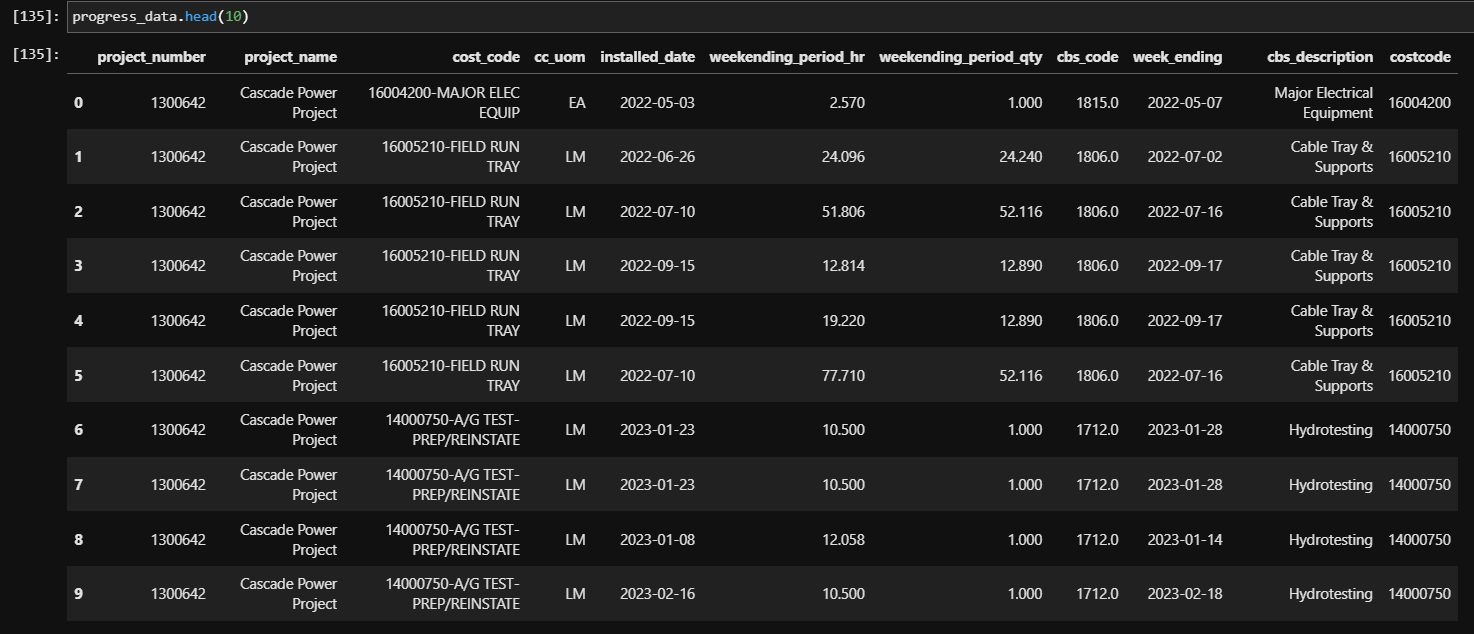

## Grouping and Aggregating Data

### Step 10: Summerize the actual hour data by 'week_ending' and 'costcode' from actual_hour_data DataFrame

Name the summerized dataframe as sum_actual_hour

In [136]:
sum_actual_hour = actual_hour_data.groupby(['week_ending', 'costcode']).sum().reset_index()
sum_actual_hour = sum_actual_hour.drop(columns=['project_number'])
sum_actual_hour['week_ending'] = pd.to_datetime(sum_actual_hour['week_ending'])
sum_actual_hour['costcode'] = sum_actual_hour['costcode'].astype(str)

C:\Users\CFeng\AppData\Local\Temp\ipykernel_21000\1402340008.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Step 11: Summerize the 'weekending_period_qty' by 'week_ending' and 'costcode' from progress_data

Name the summerized dataframe from this step as sum_progress_data

In [142]:
progress_data_sub = progress_data[['costcode', 'week_ending', 'weekending_period_qty']]
sum_progress_data = progress_data_sub.groupby(['week_ending', 'costcode']).sum().reset_index()

### Step 12: Merge the sum_actual_hour and sum_progress_data dataframe from Step 10 and Step 11 to get the weekending_period_qty and actual hour by costcode and weekending

Name the merged dataframe as merged_df

In [147]:
merged_df = pd.merge(sum_progress_data, sum_actual_hour, on = ['week_ending','costcode'], how = 'outer')
merged_df

### Step 13: Find the month ending date from the week_ending data from the merged_df generated in Step 12

In [149]:
merged_df['month_ending'] = merged_df['week_ending'] + pd.offsets.MonthEnd(0) 

The merged_df should look similar to the screenshot below by the end of this step

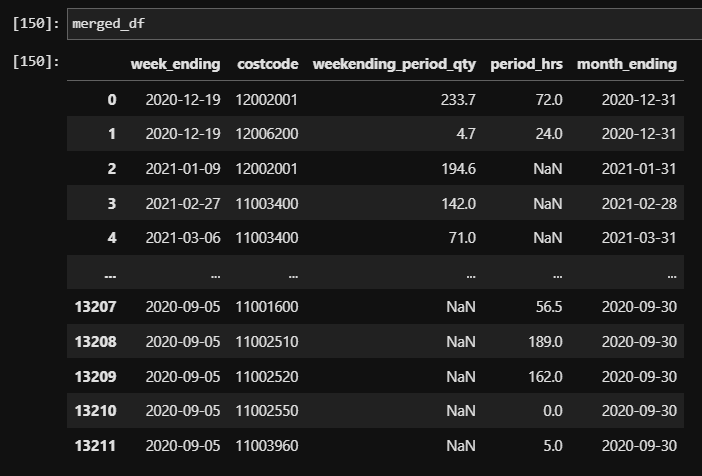

### Step 14: Aggregate the weekending_period_qty and period_hrs by month_ending and costcode

Name the merged dataframe as merged_df_by_month

In [151]:
merged_df_by_month = merged_df.groupby(['month_ending', 'costcode']).sum().reset_index()

C:\Users\CFeng\AppData\Local\Temp\ipykernel_21000\2278630053.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Step 15: Lookup the cbs description from the costcode

In [153]:
costcode_list = progress_data[['costcode', 'cbs_description']].drop_duplicates()
merged_df_by_month = pd.merge(merged_df_by_month, costcode_list, on='costcode', how='left')

### Step 16: Drop the n/a cbs_description rows

In [156]:
merged_df_by_month = merged_df_by_month.dropna(subset=['cbs_description'])

### Step 17: Aggregate the weekending_period_qty and period_hrs by cbs_description and month_ending

In [158]:
merged_df_by_month = merged_df_by_month.groupby(['month_ending', 'cbs_description']).sum().reset_index()

C:\Users\CFeng\AppData\Local\Temp\ipykernel_21000\1362855746.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Step 18: Add column 'production_rate' which is equal to the 'weekending_period_qty' divided by 'period_hrs' 

In [160]:
merged_df_by_month['production_rate'] = merged_df_by_month['weekending_period_qty']/merged_df_by_month['period_hrs']

The final dataframe should look similar to the screenshot below at the end of this part

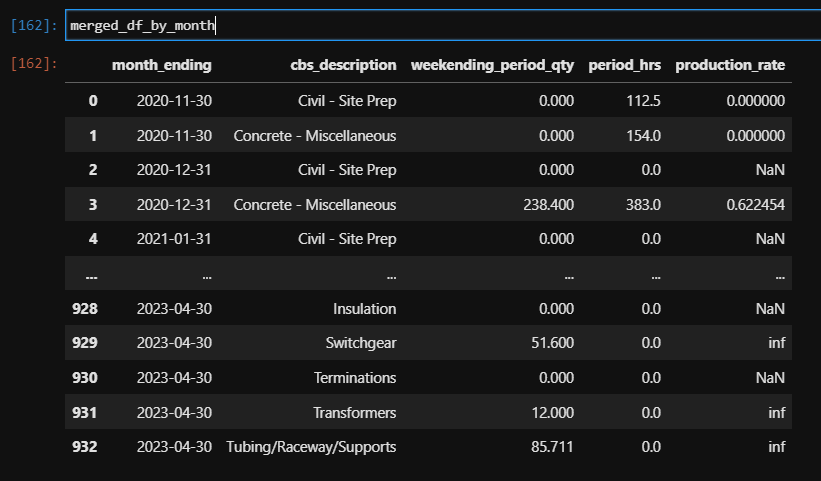

## Visualizing the Data

Finally, let's visualize the data to get some insights.

### Step 19: Display the monthly Production Rate timeseries by cbs_description 

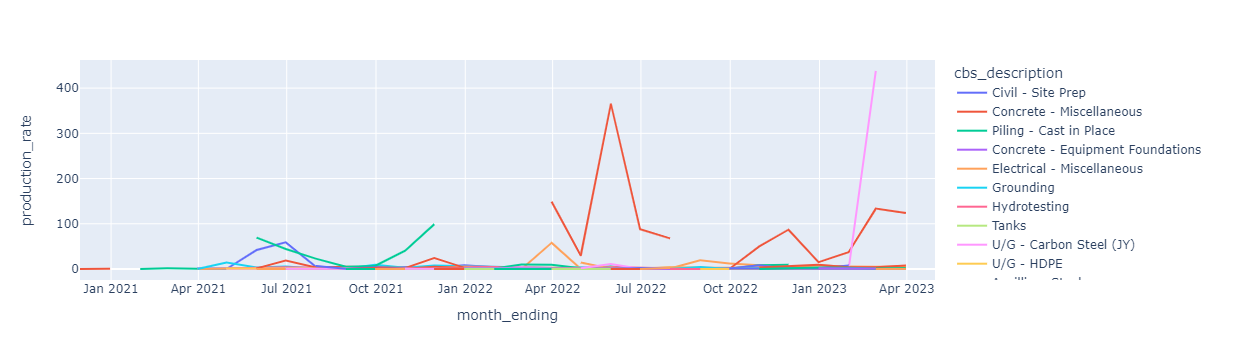

In [164]:
fig = px.line(merged_df_by_month, x="month_ending", y="production_rate", color="cbs_description")
fig.show()

## Conclusion

In this notebook, we practiced some common data wrangling techniques using Python and the Pandas library. 